In [2]:
import geopandas as gpd
from matplotlib import pyplot as plt

In [106]:
data = gpd.read_file("./test_combine/['860549330109649923204124'].shp")#读取磁盘上的矢量文件
# data = gpd.read_file("./after_combine/all_road_lines.shp")

In [13]:
data.head()

,id,geometry
0,33010900001320000002,None
1,33010900001320000003,None
2,33010900001320000004,None
3,33010900001320000005,None
4,33010900001320000006,None


In [14]:
print(data.crs)

epsg:4326


In [15]:
print(data.head())

                     id geometry
0  33010900001320000002     None
1  33010900001320000003     None
2  33010900001320000004     None
3  33010900001320000005     None
4  33010900001320000006     None


<AxesSubplot:>

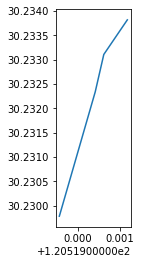

In [107]:
data.plot()

In [18]:
import json

In [19]:
with open ('./new.json') as file_obj:
    json_data = json.loads(file_obj.readline())

In [24]:
from jsonpath import jsonpath

In [27]:
# 提取path下的所有数据
location = jsonpath(json_data,"$..path")
# 提取code下的所有数据
road_num = jsonpath(json_data,"$..code")

In [33]:
from shapely import geometry

In [41]:
k=30
lines_all = gpd.GeoSeries(geometry.LineString(location[k]), crs='EPSG:4326')

In [47]:
int(road_num[0])

330109179900508760

In [54]:
import geopandas

In [105]:
# gdf = geopandas.read_file('./new.geojson')

In [67]:
location[0]#[0]
# b = a[::-1]

[[30.236757964829764, 120.24766763663753], [30.242732, 120.236295]]

In [91]:
l = [[a[::-1] for a in i] for i in location if len(i) > 1]


## geojson
属实走弯路，就应该意识到经纬度数据足够的，怎么能去花时间研究更易读取的文件格式

In [96]:
geojson = {
    "type": "FeatureCollection",
    "crs": {
        "type": "name",
        "properties": {
            "name": "EPSG:4326"
        }
    },
    "features": [
    {
        "type": "Feature",
        "geometry" : {
            "type": "LineString",
            "coordinates": l0
            }
     } for l0 in l]
}


In [108]:
output = open('new.geojson', 'w')
json.dump(geojson, output)

In [99]:
# gdf = geopandas.read_file('./new.geojson')

In [132]:

line_s1 = geopandas.GeoSeries(geometry.LineString(l[y]), crs='EPSG:4326')
line_s2 = geopandas.GeoSeries(geometry.LineString(l[y+1]), crs='EPSG:4326')
# line_s1.union(line_s2)
line_s2.plot(aspect = 1)

In [146]:
y = 1
line_s1 = geopandas.GeoSeries([geometry.LineString(l0) for l0 in l], crs='EPSG:4326')

# line_s1.plot(aspect = 1)

# 以下为正式处理步骤

In [150]:
import pandas as pd
import geopandas
from shapely import geometry
import json

In [208]:
# 读取json文件，并将其转化为dataframe操作
filename = './new.json'
with open (filename) as file_obj:
    json_data = json.loads(file_obj.readline())
raw_data = pd.DataFrame(json_data)

In [210]:
# 清洗数据，去除道路编号不存在和数据点不够两对的数据
data = raw_data.loc[(raw_data.code.str.len() > 4) & (raw_data.path.str.len() > 1)]

In [221]:
# 原始数据的经度和纬度需要调换位置
locations = [[single_loc[::-1] for single_loc in loc] for loc in data.path]
# 提取道路编号信息
road_num = list(data.code)

In [226]:
# 将经纬度数据转化为可以识别的地理信息数据
# 注意LineString需要至少两对经纬度数据，需要提前清洗数据
# 多个线段的数据直接用list存在一起即可合并为一个数据
shp_data = geopandas.GeoSeries([geometry.LineString(location) for location in locations], crs='EPSG:4326', index = road_num)

In [230]:
# 将数据写入本地shp文件
outfile = './all/all.shp'
shp_data.to_file(outfile, driver='ESRI Shapefile', encoding='utf-8')

<AxesSubplot:>

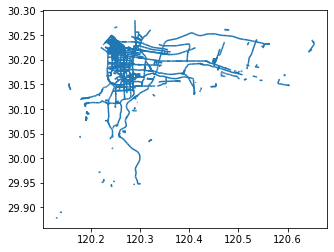

In [228]:
data = geopandas.read_file('./all.shp')
data.plot(aspect = 1) 